In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import plot_importance

In [105]:
data = pd.read_csv(r"D:\桌面文件夹\archive\StudentPerformanceFactors.csv")
data.head()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70

# 数据基本字段描述
Hours_Studied	                学习时长
Attendance	                    参加课程的百分比
Parental_Involvement	        家长参与学生教育的程度(低、中、高)
Access_to_Resources	            教育资源的可用性(低、中、高)
Extracurricular_Activities	    参加课外活动(是否)。
Sleep_Hours	                    平均每天睡觉的时长
Previous_Scores                 最近一次的考试成绩
Motivation_Level	            学生的动力水平(低 中 高)
Internet_Access	                是否可以上网(是，否)
Tutoring_Sessions	            每月参加辅导课程的次数
Family_Income	                家庭收入水平(低、中、高)
Teacher_Quality	                教师的质量(低 中 高)
School_Type	                    学校的性质 (公立, 私立).
Peer_Influence	                同伴对学习成绩的影响(积极，中性，消极)
Physical_Activity	            每周运动的平均小时数
Learning_Disabilities	        有无学习障碍(是，否)
Parental_Education_Level	    父母的最高学历(高中、大学、研究生)
Distance_from_Home	            家到学校的距离(近、中、远)。
Gender	                        学生性别(男、女)。
Exam_Score	                    期末考试成绩

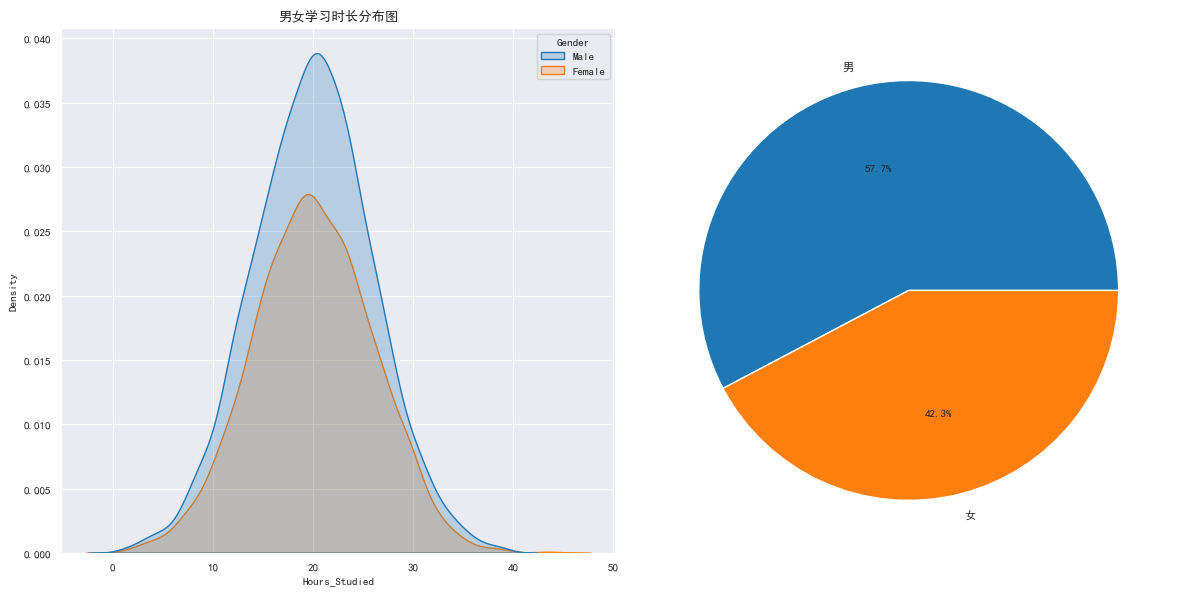

In [106]:
# KDE图画出不同性别的学生花多少时间学习,并且调查的男生女生性别比
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# 画出不同性别的男女学习时长
sns.kdeplot(data=data, x='Hours_Studied', hue='Gender', ax=ax1, fill=True)
ax1.set_title('男女学习时长分布图')
ax2.pie(data['Gender'].value_counts(), labels=['男', '女'], autopct='%1.1f%%')
plt.tight_layout()
plt.show()

第一个图表示男生和男生的概论分布图，第二个是genders的饼图,发现男生的学习时长分布比较平均,方差小,女生学习时长分布比较集中,方差大.
拼图表示受调查的人数中,主要是男生比例大,但是相差的不太多

In [107]:
# 找出数值型变量和分类型变量
num_col = [i for i in data.columns if data[i].unique().size > 5]
cat_col = [i for i in data.columns if data[i].unique().size <= 5]
print(f'数值型变量有{len(num_col)}个, 分类变量有{len(cat_col)}个')

数值型变量有7个, 分类变量有13个


In [108]:
num_col

['Hours_Studied',
 'Attendance',
 'Sleep_Hours',
 'Previous_Scores',
 'Tutoring_Sessions',
 'Physical_Activity',
 'Exam_Score']

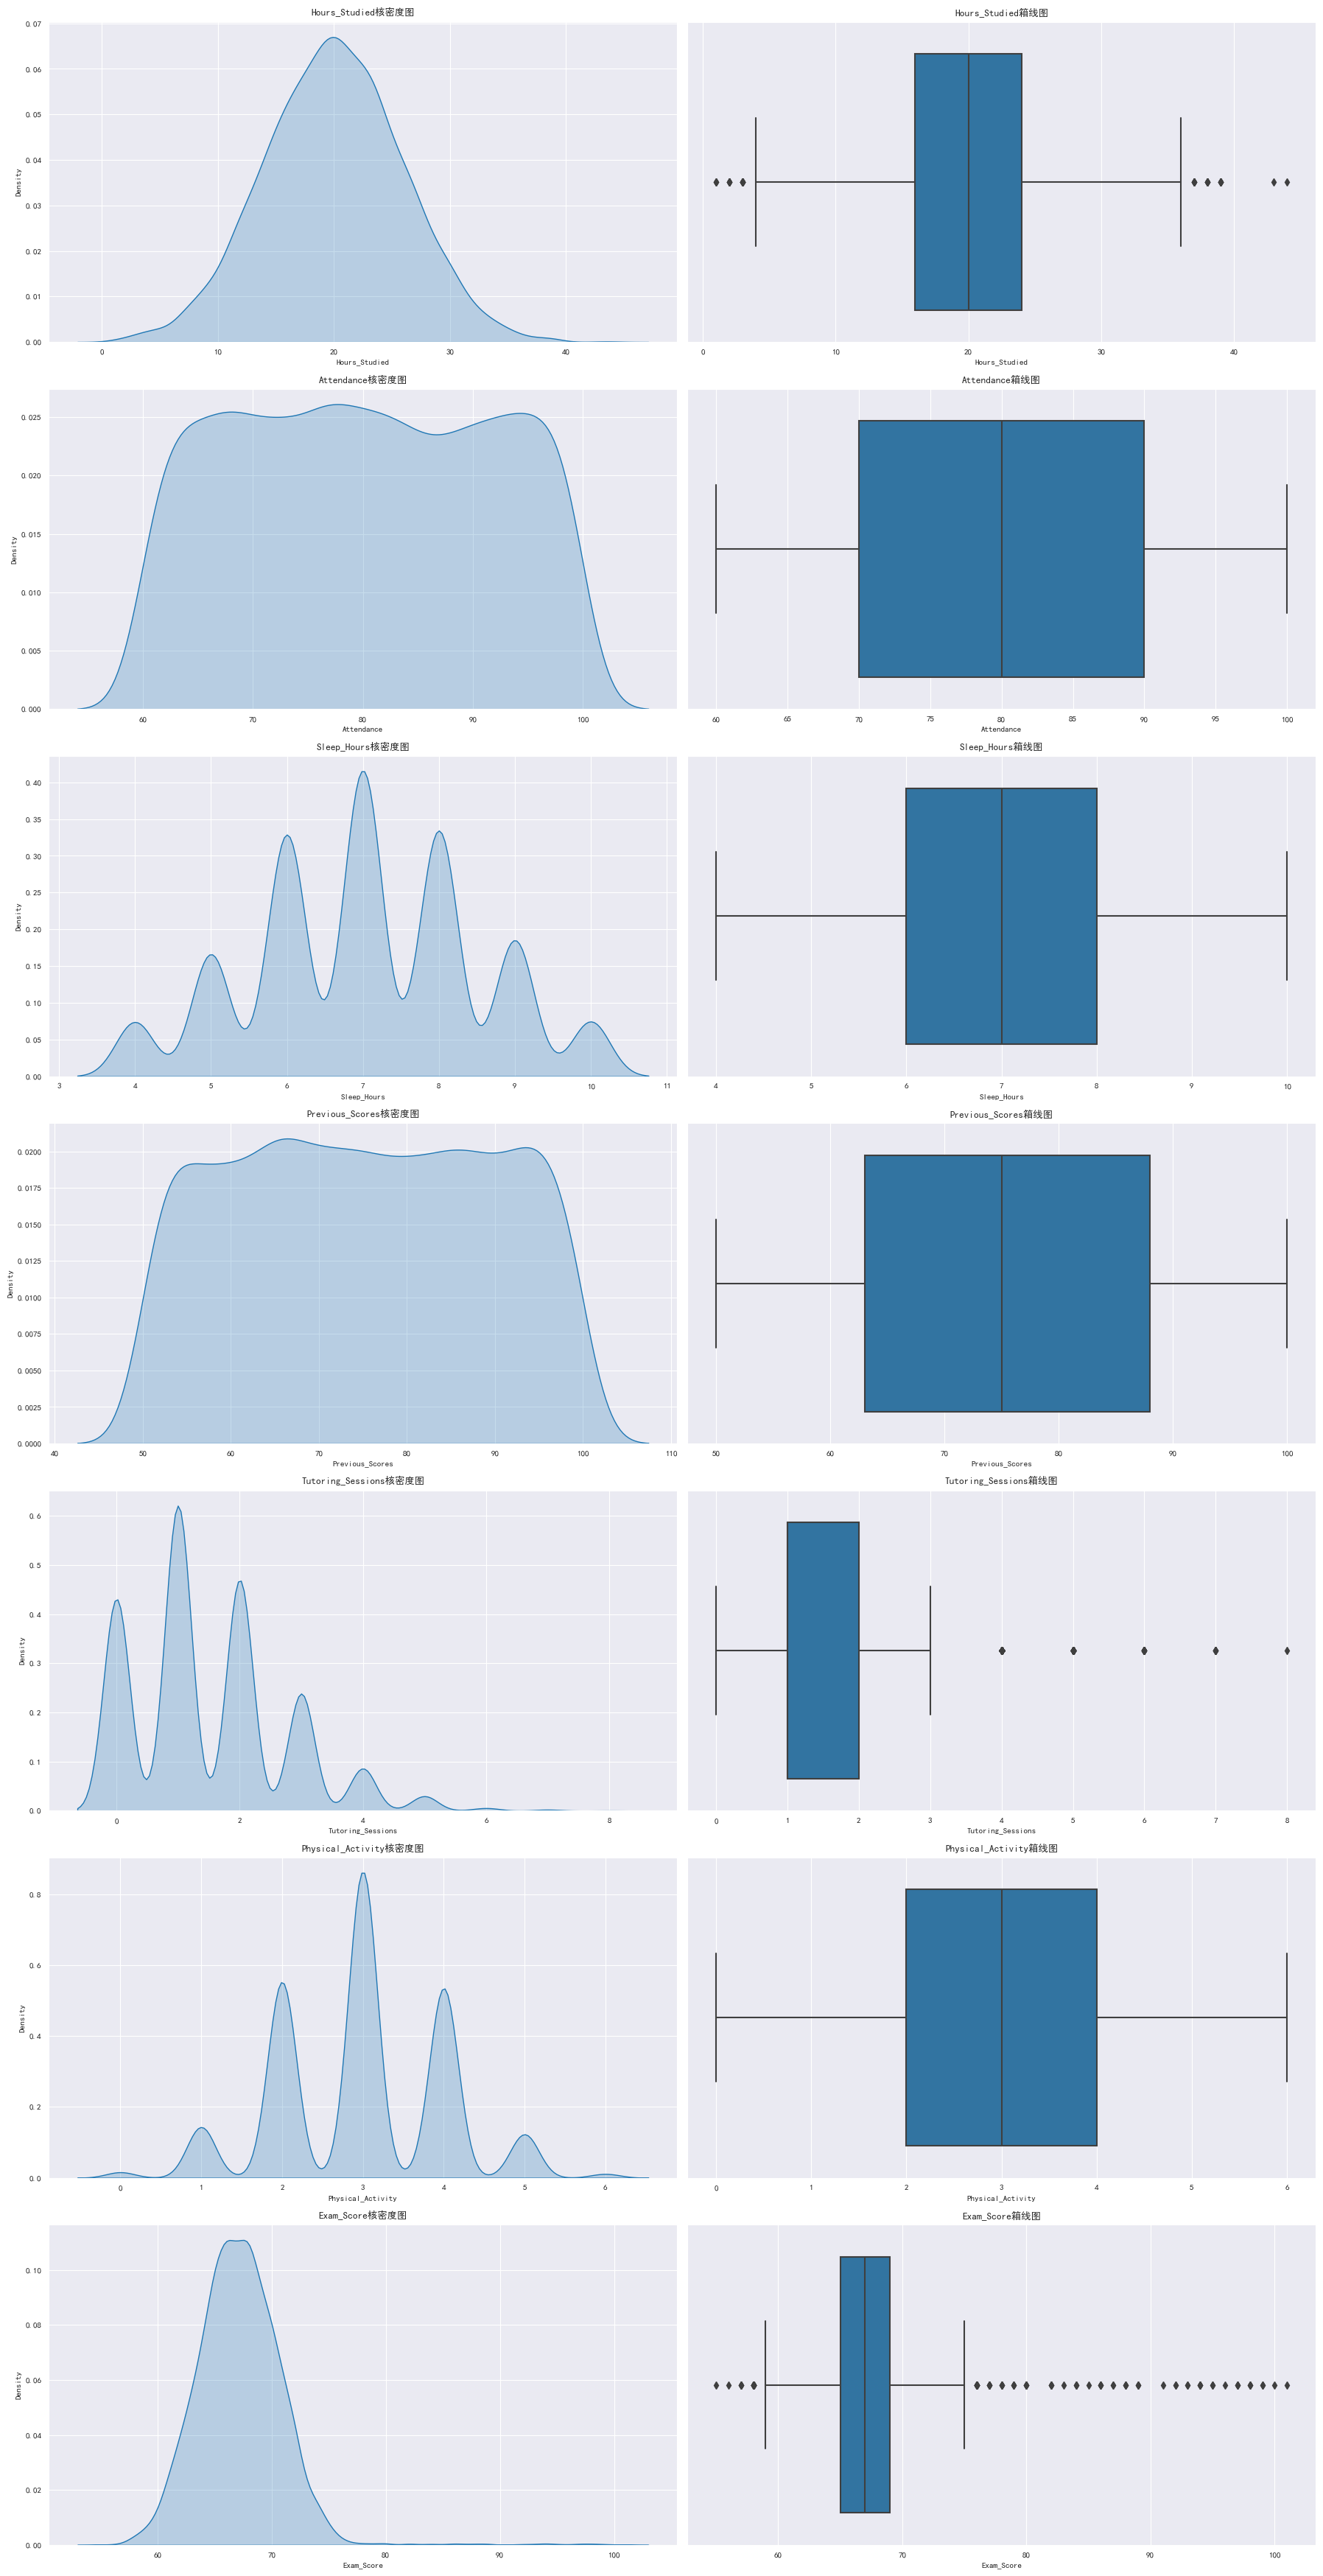

In [109]:
# 数值变量的的可视化,一个核密度,一个箱线图
plt.figure(figsize=(18,35))
plot_number = 1
for col in num_col:
    if plot_number <= len(num_col):
        # 核密度图
        plt.subplot(len(num_col), 2, 2 * plot_number - 1) # 设置子图位置
        ax1 = sns.kdeplot(data=data, x=col, fill=True)
        ax1.set_title(f'{col}核密度图')

        plt.subplot(len(num_col), 2, 2 * plot_number)
        ax2 = sns.boxplot(data=data, x=col)
        ax2.set_title(f'{col}箱线图')

        plot_number += 1

plt.tight_layout()
plt.show()

这两个图都是表示的是数值变量的分布情况,和第一个一样,我就不一个一个的分析和解释了.

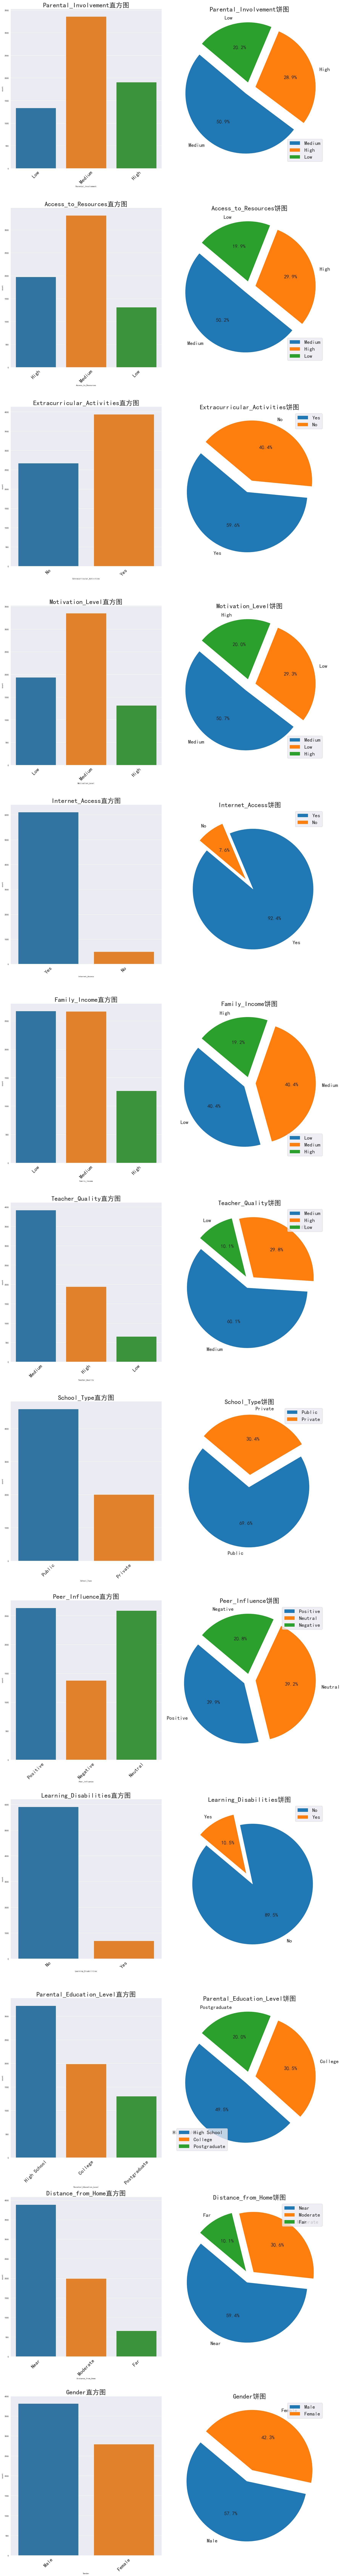

In [110]:
# 分类变量的可视化(直方图, 饼图)
plt.figure(figsize=(18,135))

cat_plot_number = 1
for col in cat_col:
    if cat_plot_number <= len(cat_col):
        # 创建直方图子图
        plt.subplot(len(cat_col), 2, 2 * cat_plot_number - 1)
        ax1 = sns.countplot(data=data, x=col)
        ax1.set_title(f'{col}直方图', fontsize=25)
        plt.xticks(rotation=45, fontsize=20)


        # 创建饼图子图
        plt.subplot(len(cat_col), 2, 2 * cat_plot_number)
        counts = data[col].value_counts()
        labels = counts.index
        # 设置每一个类别的分隔大小
        explode = [0.1] * len(labels)
        ax2 = plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140,explode=explode, radius=1, textprops={'fontsize': 20})
        plt.title(f'{col}饼图', fontsize=25)
        plt.legend(loc='best', fontsize=20)

        cat_plot_number += 1
plt.tight_layout()
plt.show()

# 单变量的可视化已经完成,现在我们进行多变量分析

<Figure size 2400x2400 with 0 Axes>

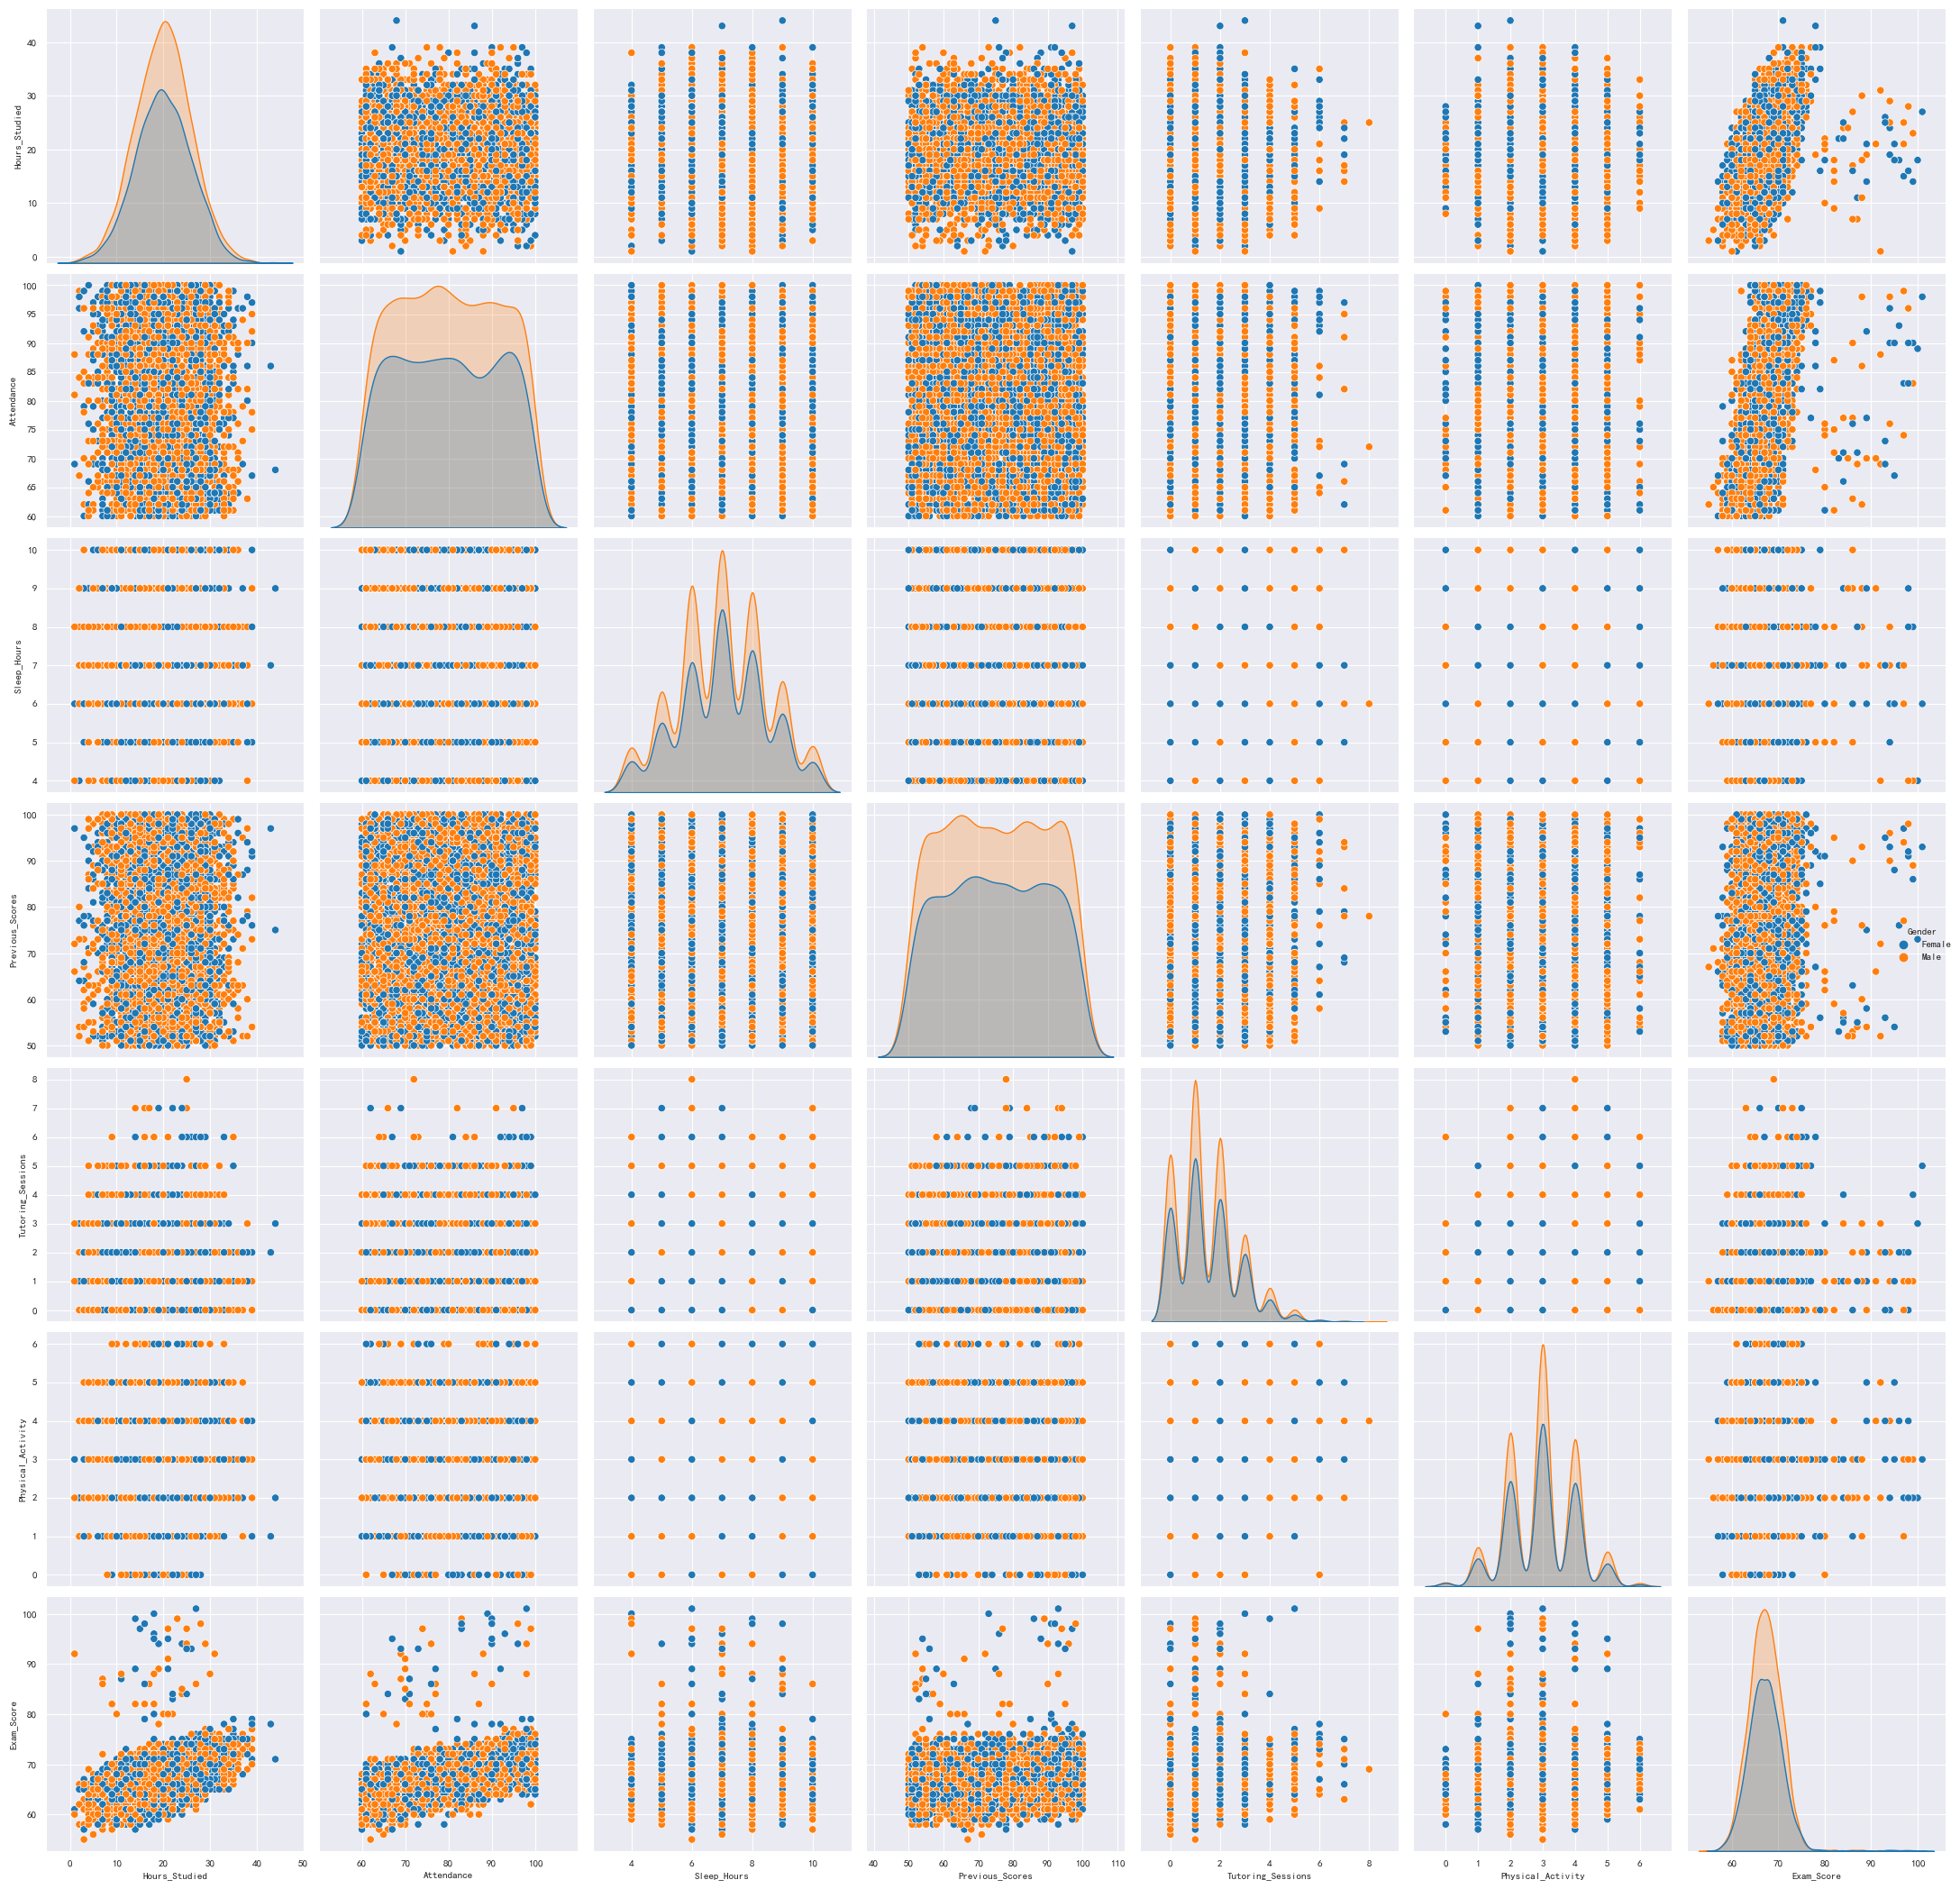

In [111]:
# 不同性别的散点图矩阵
plt.figure(figsize=(24,24))
# 把性别设置成分类变量
data['Gender'] = data['Gender'].astype('category')
sns.pairplot(data=data[num_col + cat_col], hue='Gender', diag_kind='kde', height=3)
plt.xticks(rotation=45, fontsize=25)
plt.yticks(rotation=45, fontsize=25)
plt.tight_layout()


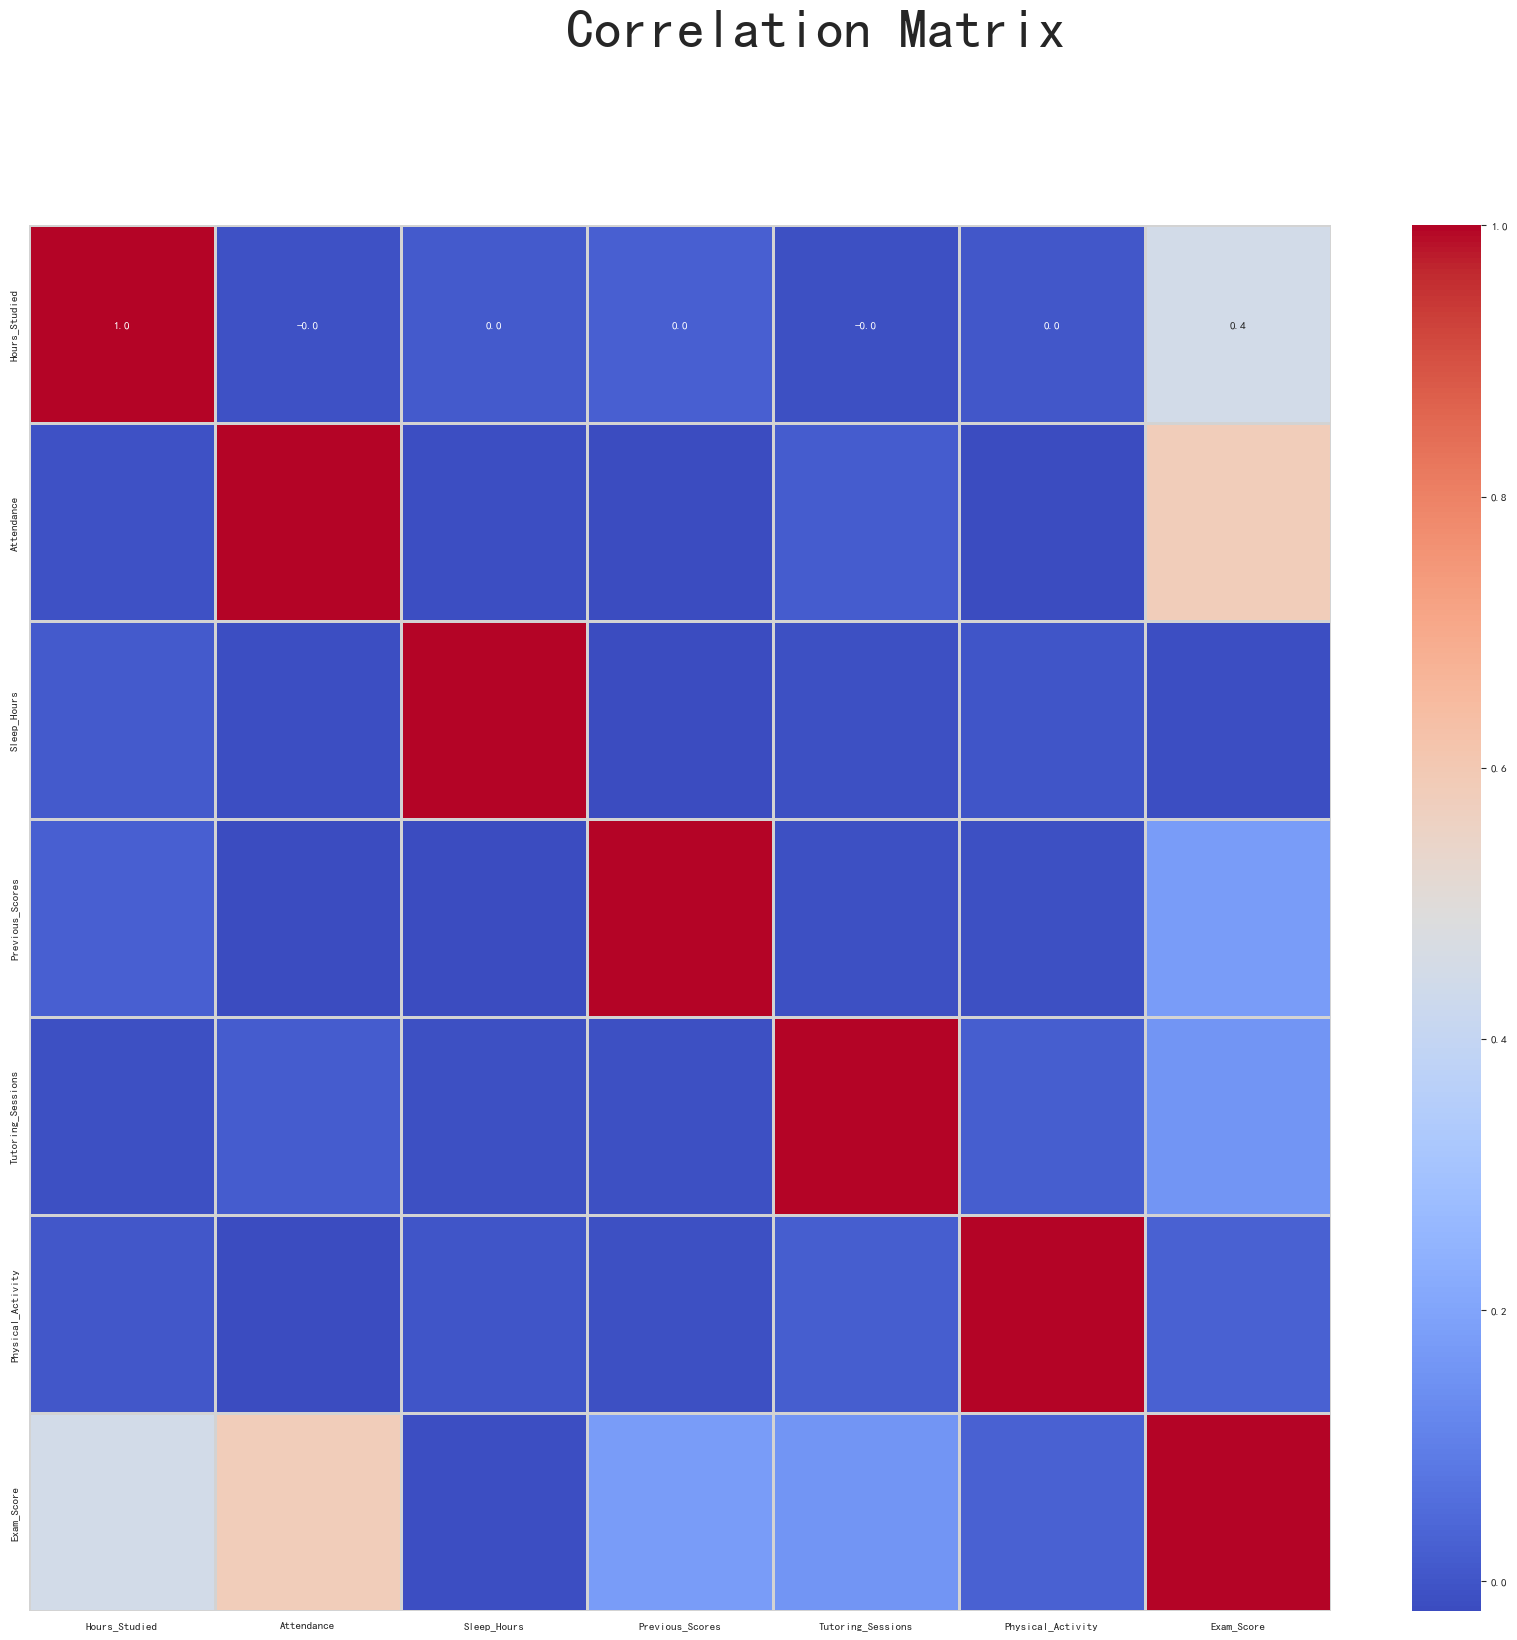

In [112]:
plt.figure(figsize=(21, 18))
sns.heatmap(data[num_col].corr(), annot=True, cmap='coolwarm', fmt='.1f', linewidths=2, linecolor='lightgrey')
plt.suptitle('Correlation Matrix', fontsize=40, y=1)
plt.show()

<Figure size 1800x2400 with 0 Axes>

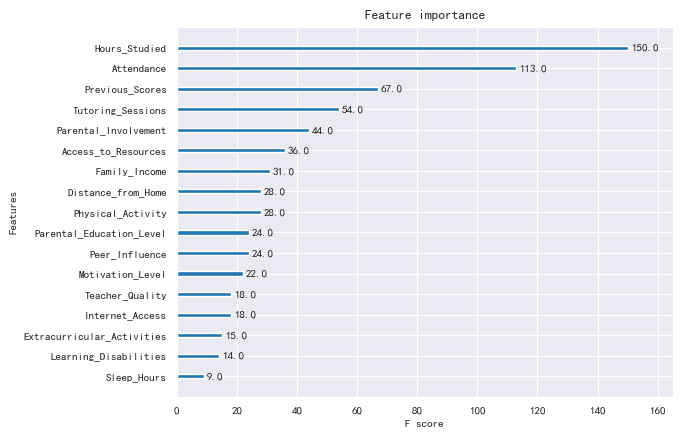

In [113]:
data['Gender'] = data['Gender'].astype('object')
X = data.drop(['Exam_Score'], axis=1)
y = data['Exam_Score']
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.01, seed=42)
model.fit(X_train, y_train)
plt.figure(figsize=(18, 24))
plot_importance(model)
plt.show()